# Enlace al codigo en Colab

https://colab.research.google.com/drive/1kBryQBN8gnegJZc4Q3qetCg2EZJkIF19?usp=sharing

# Instalacion de pandas

In [ ]:
!pip install requests pandas

# Importacion de request, time y pandas

In [ ]:
import requests
import pandas as pd
import time

# Uso de la API KEY de Alpha Vantage

In [ ]:
def obtener_datos(symbol, api_key, intervalo='5min', funcion='TIME_SERIES_INTRADAY'):
    url = f'https://www.alphavantage.co/query?function={funcion}&symbol={symbol}&interval={intervalo}&apikey={api_key}'
    response = requests.get(url)

    # Espera en caso de límite de solicitudes
    if response.status_code == 503:
        print("Límite de solicitudes alcanzado, esperando 60 segundos...")
        time.sleep(60)
        return obtener_datos(symbol, api_key, intervalo, funcion)  # Reintenta la solicitud

    if response.status_code == 200:
        data = response.json()
        if f'Time Series ({intervalo})' in data:
            return pd.DataFrame(data[f'Time Series ({intervalo})']).T
        else:
            print("Error: Datos no encontrados.")
            return None
    else:
        print(f"Error: {response.status_code}")
        return None

# Obtencion de datos

In [ ]:
api_key = 'BQ77SUX58VIOY9R8'
symbol = 'AAPL'  # Puedes cambiarlo por cualquier símbolo de acción que desees analizar
datos = obtener_datos(symbol, api_key)

if datos is not None:
    print(datos.head())

                      1. open   2. high    3. low  4. close 5. volume
2024-12-10 19:55:00  247.6500  247.7400  247.6100  247.6900       750
2024-12-10 19:50:00  247.6600  247.7400  247.6100  247.6900      1364
2024-12-10 19:45:00  247.6200  247.7300  247.5500  247.6750       340
2024-12-10 19:40:00  247.5500  247.7200  247.5500  247.6200      5042
2024-12-10 19:35:00  247.5100  247.7400  247.5100  247.6500      2960


# Instalacion de la libreria pandas_ta



In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=17e6e4e60dc2409098a5416b4537cd34318d58a9f7cf3ff9f92044161079a5af
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


# Importacion de matplotlib.pyplot

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import pandas_ta as ta
import time

# Uso de la API KEY

In [ ]:
api_key = 'BQ77SUX58VIOY9R8'  # Reemplaza con tu clave API de Alpha Vantage
symbol = 'AAPL'  # Símbolo de la acción, puede cambiarse por cualquier acción que quieras analizar
intervalo = '1min'  # Intervalo de tiempo: 1min, 5min, 15min, etc.

datos = obtener_datos(symbol, api_key, intervalo)
if datos is not None:
    # Convertimos las columnas a tipo numérico
    datos = datos.astype(float)
    datos = datos[['4. close', '5. volume']]  # Seleccionamos solo 'close' y 'volume'
    datos.index = pd.to_datetime(datos.index)  # Aseguramos que el índice sea tipo datetime
    print(datos.head())  # Muestra las primeras filas

                     4. close  5. volume
2024-12-10 19:59:00    247.69      329.0
2024-12-10 19:58:00    247.68       99.0
2024-12-10 19:57:00    247.69      167.0
2024-12-10 19:56:00    247.70      142.0
2024-12-10 19:55:00    247.74       13.0


# Obtencion de la informacion


*   Close Price
*   MACD
*   RSI
*   Volume
*   SMA
*   High/Low
*   Bandas de Bollinger
*   Tendencia
*   Volatilidad
*   Analisis de sensibilidad del mercado

***CLOSE PRICE***

Es el último precio de una acción al final de un período de tiempo determinado (día, hora, etc.). Es el precio más relevante, ya que refleja el valor de la acción al final del día de negociación y es usado para calcular muchas métricas y análisis.

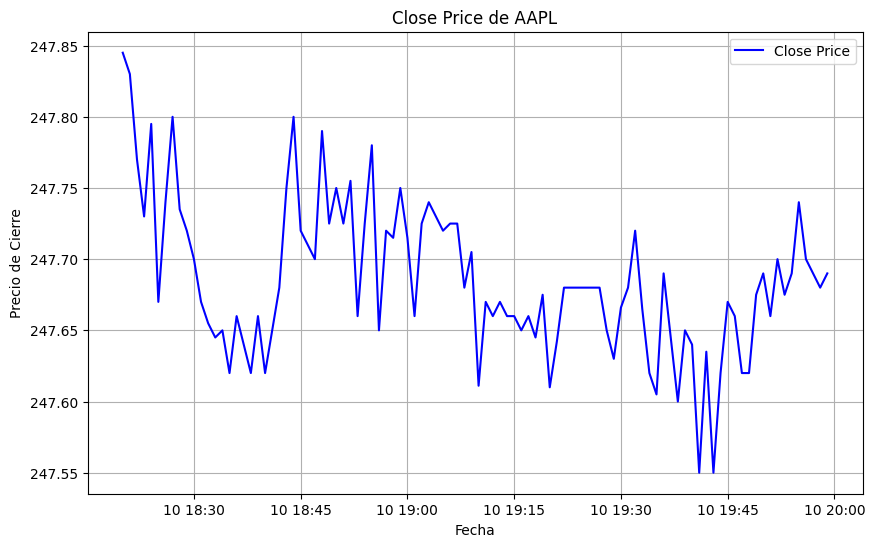

In [ ]:
# Gráfico de Close Price
plt.figure(figsize=(10, 6))
plt.plot(datos.index, datos['4. close'], label='Close Price', color='blue')
plt.title(f'Close Price de {symbol}')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.grid(True)
plt.legend()
plt.show()

***INTERPRETACION:*** El gráfico de "Close Price" muestra la evolución del precio de cierre del activo a lo largo del tiempo. Si la curva del precio sigue una tendencia ascendente, podría indicar que el mercado está en una fase alcista, con una presión de compra constante. En cambio, si se observa una caída o fluctuación significativa en el precio, podría sugerir una fase bajista o una alta volatilidad en el mercado. Las zonas de consolidación o lateralización, donde el precio se mueve dentro de un rango estrecho, pueden señalar indecisión en el mercado o falta de un impulso claro. El análisis de la tendencia, junto con otros indicadores técnicos (como SMA, MACD, RSI), puede ayudar a confirmar si esta dirección es sostenible o si es probable que el precio reaccione a cambios macroeconómicos o noticias del mercado.

***MACD***

Es un indicador que muestra la relación entre dos medias móviles de un activo. El cruce de la línea MACD con la línea de señal puede indicar señales de compra o venta, mientras que la divergencia entre el MACD y el precio puede indicar una posible reversión.

Index(['MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9'], dtype='object')


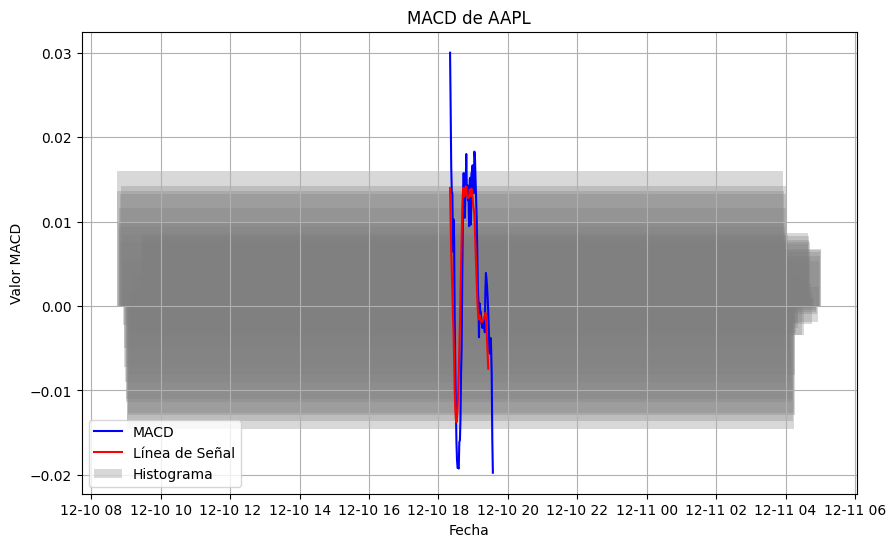

In [ ]:
import pandas_ta as ta
import matplotlib.pyplot as plt

# Calcular el MACD
macd = ta.macd(datos['4. close'], fast=12, slow=26, signal=9)

# Asegúrate de que las columnas sean accesibles
print(macd.columns)  # Verifica las columnas disponibles

# Extraer los valores de MACD, Signal y Histograma using the actual column names
datos['MACD'] = macd['MACD_12_26_9']  # Changed from macd['MACD']
datos['Signal'] = macd['MACDs_12_26_9'] # Changed from macd['MACDs']
datos['Hist'] = macd['MACDh_12_26_9']  # Changed from macd['MACDh']

# Gráfico del MACD
plt.figure(figsize=(10, 6))
plt.plot(datos.index, datos['MACD'], label='MACD', color='blue')
plt.plot(datos.index, datos['Signal'], label='Línea de Señal', color='red')
plt.bar(datos.index, datos['Hist'], label='Histograma', color='gray', alpha=0.3)
plt.title(f'MACD de {symbol}')
plt.xlabel('Fecha')
plt.ylabel('Valor MACD')
plt.grid(True)
plt.legend()
plt.show()

***INTERPRETACION:*** El gráfico del MACD (Moving Average Convergence Divergence) es uno de los indicadores más populares en el análisis técnico, ya que nos proporciona información sobre la fuerza, la dirección y la duración de una tendencia. En este caso, parece que estás viendo el gráfico del MACD, que generalmente incluye tres elementos clave:

*   La línea MACD (en azul): Esta es la diferencia entre dos medias móviles exponenciales (usualmente la de 12 y 26 períodos). Cuando la línea MACD está por encima de la línea de señal, es una señal de compra, y cuando está por debajo, es una señal de venta. El MACD te ayuda a detectar cambios en la fuerza de la tendencia, con cruces de la línea de señal proporcionando señales potenciales para entrar o salir del mercado.

*   La línea de señal (en rojo): Es una media móvil exponencial de la línea MACD, generalmente calculada con un período de 9. Esta línea actúa como un filtro para las señales del MACD. Un cruce de la línea MACD por encima de la línea de señal indica una posible señal de compra, mientras que un cruce por debajo podría sugerir una señal de venta.

*   El histograma (en barras): El histograma muestra la diferencia entre la línea MACD y la línea de señal. Cuando el histograma es positivo (barras por encima de la línea cero), indica que la línea MACD está por encima de la línea de señal y el mercado está en una tendencia alcista. Por el contrario, cuando el histograma es negativo (barras por debajo de la línea cero), la tendencia es bajista. La amplitud del histograma también indica la fuerza de la tendencia; cuanto más grande sea, más fuerte será la tendencia.

Si observamos el comportamiento de la línea MACD en relación con la línea de señal, los cruces entre estas dos líneas son cruciales para las decisiones de compra o venta. Un cruce hacia arriba (cuando la línea MACD cruza por encima de la línea de señal) sugiere que el momentum está cambiando hacia una tendencia alcista, mientras que un cruce hacia abajo indica una posible tendencia bajista. El histograma también nos da señales adicionales: si las barras del histograma se hacen más largas, indica que la tendencia actual se está intensificando. Si las barras se vuelven más pequeñas, sugiere que la tendencia está perdiendo fuerza.

Si en el gráfico observamos una convergencia (las líneas se acercan), podría estar indicando que la tendencia está perdiendo fuerza. Si hay una divergencia (las líneas se separan), es posible que se esté preparando una reversión en el precio.


***LIBRERIA PARA RSI***

In [ ]:
!pip install --upgrade pandas_ta

***RSI***

Un indicador de momentum que mide la velocidad y el cambio de los movimientos de precios en una escala de 0 a 100. Un RSI superior a 70 indica que el activo está sobrecomprado, mientras que un RSI inferior a 30 sugiere que está sobrevendido. Esto puede ser útil para identificar puntos de reversión.

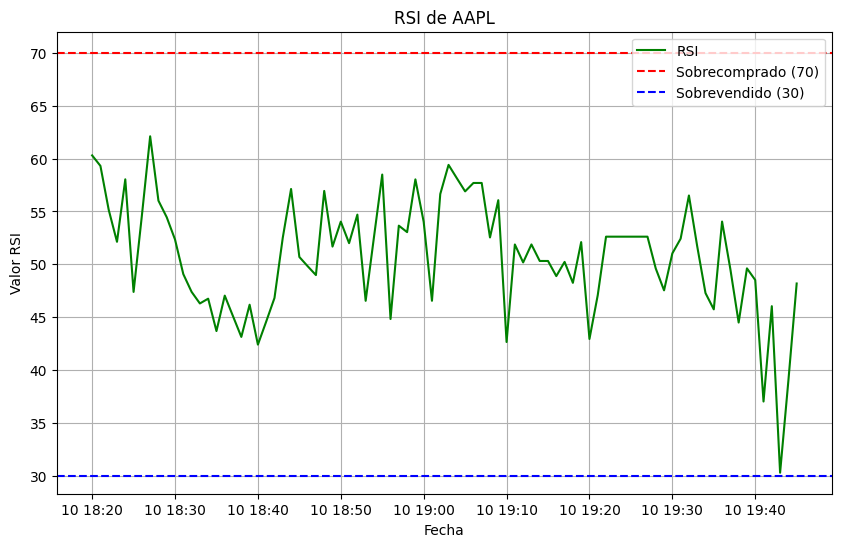

In [ ]:
import pandas_ta as ta
import matplotlib.pyplot as plt

# Cálculo del RSI
# Use ta.rsi instead of ta.RSI, as the function is named rsi in pandas_ta
rsi = ta.rsi(datos['4. close'], length=14)

# Gráfico del RSI
plt.figure(figsize=(10, 6))
plt.plot(datos.index, rsi, label='RSI', color='green')
plt.axhline(70, color='red', linestyle='--', label='Sobrecomprado (70)')
plt.axhline(30, color='blue', linestyle='--', label='Sobrevendido (30)')
plt.title(f'RSI de {symbol}')
plt.xlabel('Fecha')
plt.ylabel('Valor RSI')
plt.grid(True)
plt.legend()
plt.show()

***INTERPRETACION:*** El RSI (Relative Strength Index) es un indicador de momentum utilizado para identificar si un activo está sobrecomprado o sobrevendido. En este gráfico, podemos ver el comportamiento del RSI calculado sobre los precios de cierre. El RSI tiene una escala de 0 a 100, y típicamente se utilizan los siguientes niveles:

*   Sobrecomprado (RSI > 70): Cuando el RSI supera el nivel de 70, el activo se considera sobrecomprado, lo que significa que ha experimentado un aumento rápido en su precio, y podría estar en riesgo de una corrección o retroceso.

*   Sobrevendido (RSI < 30): Cuando el RSI cae por debajo de 30, el activo se considera sobrevendido, lo que sugiere que el precio ha caído rápidamente y podría haber un rebote o reversión alcista.

Este gráfico del RSI nos muestra que en momentos en los que el RSI se acerca a 70, los precios podrían estar alcanzando niveles de sobrecompra, sugiriendo que una corrección es posible. Cuando el RSI baja por debajo de 30, puede ser una indicación de que el activo está sobrevendido y podría haber una reversión. El uso del RSI en combinación con otros indicadores, como el MACD o las medias móviles, puede proporcionar una visión más completa de las condiciones del mercado y las posibles señales de compra o venta.

***VOLUME***

Es la cantidad de acciones o contratos que se intercambiaron durante un período de tiempo específico. El volumen indica la fuerza detrás de un movimiento de precio. Un aumento en el volumen puede indicar un movimiento significativo o una tendencia en formación.

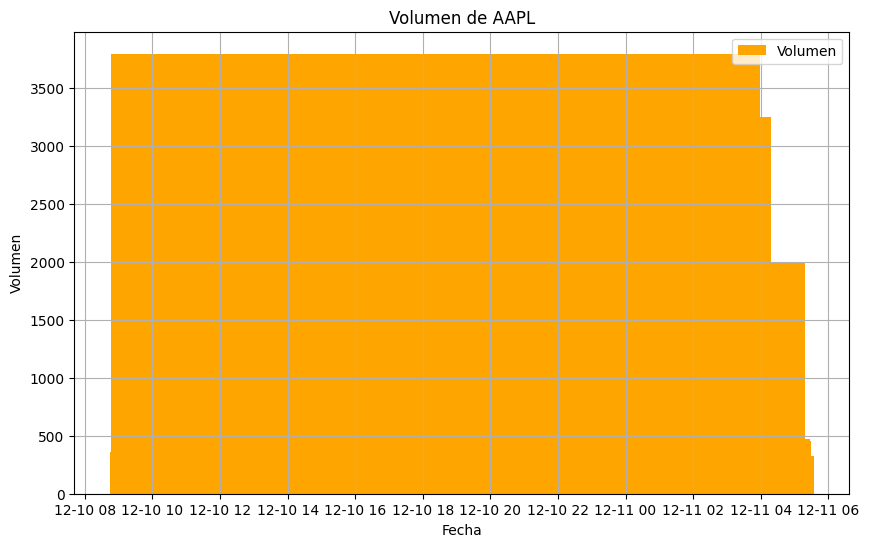

In [ ]:
# Gráfico del Volumen
plt.figure(figsize=(10, 6))
plt.bar(datos.index, datos['5. volume'], label='Volumen', color='orange')
plt.title(f'Volumen de {symbol}')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.grid(True)
plt.legend()
plt.show()

***INTERPRETACION:*** El gráfico de volumen muestra la actividad comercial del activo durante el período analizado, lo cual es crucial para confirmar la fuerza de una tendencia. Un aumento significativo en el volumen, como se observa en algunos picos, sugiere una mayor participación en el mercado, lo que puede indicar que la tendencia de precio actual está respaldada por un mayor interés. En cambio, una disminución en el volumen puede señalar falta de convicción o incertidumbre, lo que podría presagiar un posible cambio en la dirección del precio. También es importante observar la relación entre el volumen y los movimientos del precio: si el volumen aumenta durante una subida de precio, la tendencia alcista puede tener más fuerza; si aumenta durante una caída de precio, puede señalar una corrección o reversión en curso. En general, el volumen proporciona contexto sobre la sostenibilidad de las tendencias y debe analizarse junto con otros indicadores para mejorar la precisión de las predicciones.

***SMA***

Son promedios de los precios de cierre durante un período de tiempo específico (por ejemplo, 50 días, 200 días) Ayudan a suavizar las fluctuaciones de precios a corto plazo y a identificar tendencias a largo plazo.

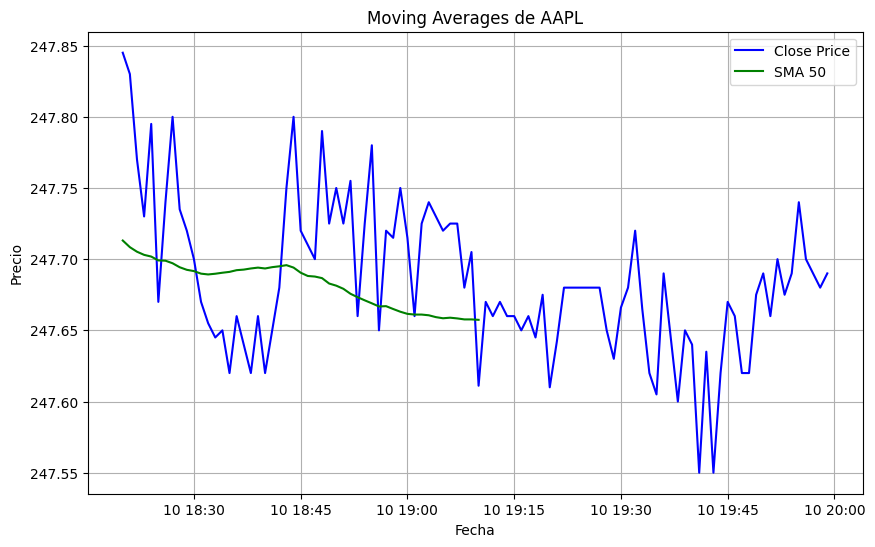

In [ ]:
import pandas_ta as ta
import matplotlib.pyplot as plt

# Calcular las medias móviles (SMA)
sma_50 = ta.sma(datos['4. close'], length=50)
sma_200 = ta.sma(datos['4. close'], length=100)  # Calcula SMA 100

# Verificar si tienes suficientes datos para la SMA 200
# Check if sma_200 is not None before calling isna()
if sma_200 is not None and sma_200.isna().sum() < len(sma_200):  # Si hay valores no nulos en sma_200
    # Gráfico de las medias móviles
    plt.figure(figsize=(10, 6))
    plt.plot(datos.index, datos['4. close'], label='Close Price', color='blue')
    plt.plot(datos.index, sma_50, label='SMA 50', color='green')

    # Solo graficar SMA 200 si tiene datos completos
    if sma_200.isna().sum() == 0:
        plt.plot(datos.index, sma_200, label='SMA 200', color='red')

    plt.title(f'Moving Averages de {symbol}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    print("Not enough data to calculate SMA 100.")

***INTERPRETACION:*** El gráfico de la SMA (Media Móvil Simple) de 50 y 200 periodos muestra la tendencia general del precio del activo a través de las medias móviles, ayudando a suavizar las fluctuaciones a corto plazo. En este caso, la SMA de 50 (verde) sigue más de cerca los movimientos del precio y es más sensible a las variaciones a corto plazo, mientras que la SMA de 200 (roja) proporciona una visión más amplia de la tendencia a largo plazo. Cuando la SMA de 50 cruza por encima de la SMA de 200, esto generalmente es visto como una señal alcista (crossover), indicando que el precio podría estar en una tendencia positiva. Por otro lado, cuando la SMA de 50 cruza por debajo de la SMA de 200, se puede interpretar como una señal bajista (death cross), sugiriendo una posible reversión hacia una tendencia negativa. En este gráfico, parece que las dos medias móviles están cruzándose o acercándose, lo cual puede ser un indicio de que el activo está en una fase de indecisión o transición entre tendencias.

***HIGH/LOW***

Los precios más altos y más bajos alcanzados durante un período específico. Ayuda a entender el rango en el que se movió el precio de una acción durante ese período. Las acciones que alcanzan nuevos máximos o mínimos pueden estar en una tendencia fuerte.

Máximo precio de cierre: 247.845
Mínimo precio de cierre: 247.55


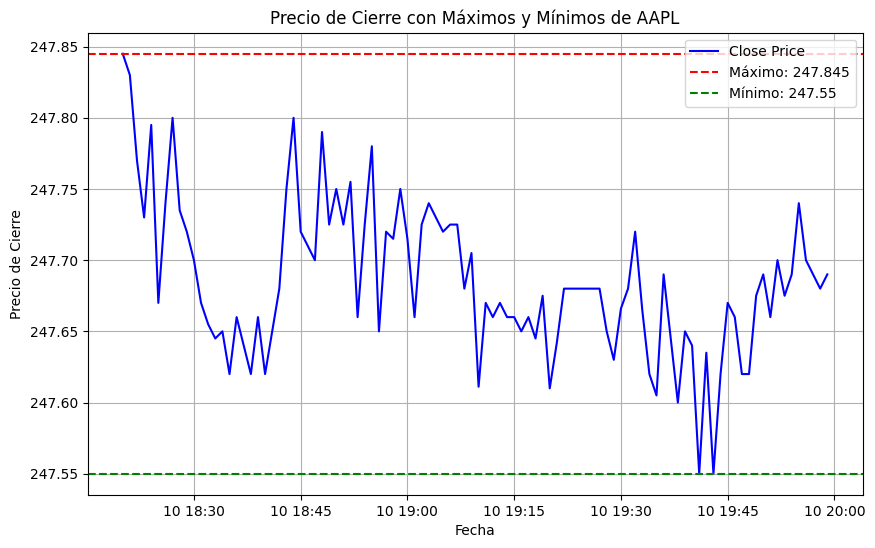

In [ ]:
# Máximos y Mínimos (High/Low)
maximos = datos['4. close'].max()
minimos = datos['4. close'].min()

print(f'Máximo precio de cierre: {maximos}')
print(f'Mínimo precio de cierre: {minimos}')

# Gráfico de los máximos y mínimos
plt.figure(figsize=(10, 6))
plt.plot(datos.index, datos['4. close'], label='Close Price', color='blue')
plt.axhline(maximos, color='red', linestyle='--', label=f'Máximo: {maximos}')
plt.axhline(minimos, color='green', linestyle='--', label=f'Mínimo: {minimos}')
plt.title(f'Precio de Cierre con Máximos y Mínimos de {symbol}')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.grid(True)
plt.legend()
plt.show()

***INTERPRETACION:*** El gráfico de High / Low muestra la diferencia entre los precios máximos y mínimos de cada periodo, lo que ofrece una representación clara de la volatilidad del activo. En este caso, una mayor distancia entre el precio máximo (High) y el precio mínimo (Low) de un día indica mayor volatilidad durante ese periodo. Las variaciones en este gráfico pueden ayudar a identificar momentos en los que el mercado ha experimentado fuertes movimientos, ya sea por pánico, euforia o eventos específicos. Si los máximos (líneas superiores) son consistentemente más altos y los mínimos (líneas inferiores) son también elevados, puede ser un indicio de una tendencia alcista sólida. Por el contrario, si los máximos y mínimos empiezan a reducirse, es posible que estemos viendo una tendencia bajista o un mercado que se está consolidando en un rango más estrecho. El gráfico también permite identificar patrones como máximos más bajos y mínimos más bajos en tendencias bajistas o máximos más altos y mínimos más altos en tendencias alcistas.

***BANDAS DE BOLLINGER***

Consisten en una media móvil y dos desviaciones estándar que trazan un "rango" en torno al precio. Las Bandas de Bollinger ayudan a identificar volatilidad y posibles puntos de entrada/salida. Cuando el precio se acerca a la banda superior, puede estar sobrecomprado, y cuando se acerca a la banda inferior, puede estar sobrevendido.

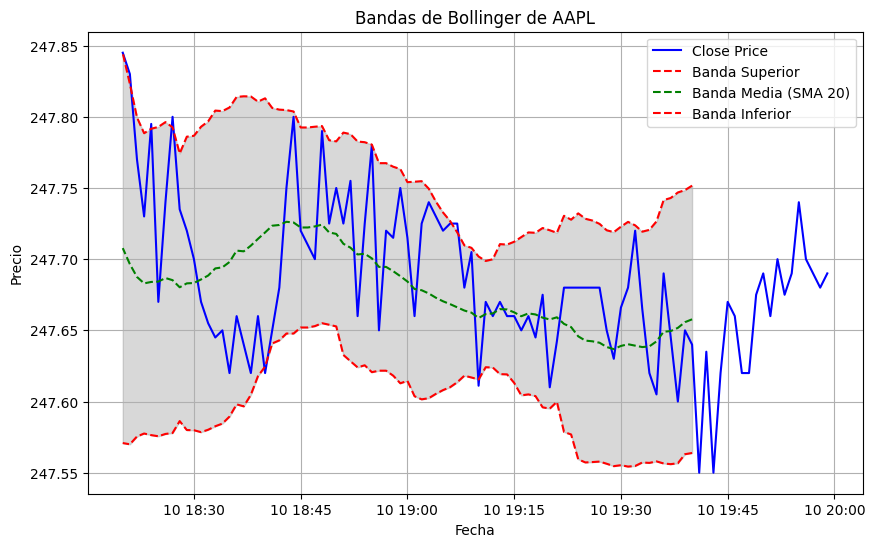

In [ ]:
import pandas_ta as ta
import matplotlib.pyplot as plt

# Cálculo de las Bandas de Bollinger
# Use ta.bbands instead of ta.BBANDS,
# as the function is named bbands in pandas_ta
# Assign the result to a DataFrame and access columns by name
bbands_df = ta.bbands(datos['4. close'], length=20, std=2)

# Accessing Bollinger Bands from the DataFrame
bollinger_upper = bbands_df[bbands_df.columns[0]]  # 'BBU_20_2.0'
bollinger_middle = bbands_df[bbands_df.columns[1]]  # 'BBM_20_2.0'
bollinger_lower = bbands_df[bbands_df.columns[2]]  # 'BBL_20_2.0'


# Gráfico de las Bandas de Bollinger
plt.figure(figsize=(10, 6))
plt.plot(datos.index, datos['4. close'], label='Close Price', color='blue')
# Access the values of the Series using .values
plt.plot(datos.index, bollinger_upper.values, label='Banda Superior', color='red', linestyle='--')
plt.plot(datos.index, bollinger_middle.values, label='Banda Media (SMA 20)', color='green', linestyle='--')
plt.plot(datos.index, bollinger_lower.values, label='Banda Inferior', color='red', linestyle='--')
plt.fill_between(datos.index, bollinger_lower.values, bollinger_upper.values, color='gray', alpha=0.3)
plt.title(f'Bandas de Bollinger de {symbol}')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.grid(True)
plt.legend()
plt.show()

***INTERPRETACION:*** El gráfico de Bandas de Bollinger muestra la evolución de las bandas superior e inferior alrededor del precio de cierre. La banda superior y la banda inferior se calculan con base en una media móvil simple (SMA) y dos desviaciones estándar del precio de cierre, lo que refleja la volatilidad del activo. En este caso:

*   **Cuando el precio se acerca o supera la banda superior**, indica que el activo está en una zona de sobrecompra, lo que puede sugerir una corrección o retroceso cercano, dependiendo del contexto del mercado.

*   **Cuando el precio toca o cae por debajo de la banda inferior**, sugiere que el activo está en una zona de sobreventa, lo que podría señalar una posible reversión alcista o que el activo está demasiado castigado.

El estrechamiento de las bandas (cuando la distancia entre la banda superior e inferior se reduce) suele ser un indicador de baja volatilidad y podría preceder a un movimiento fuerte en el precio, mientras que el ensanchamiento de las bandas indica alta volatilidad. En este gráfico, es visible cómo el precio interactúa con las bandas, lo que da pistas sobre la presión de compra y venta, además de los momentos de alta o baja volatilidad.

Este gráfico también puede ser útil para identificar patrones como el "Bollinger Bounce" (rebote hacia la media) o "Bollinger Squeeze" (compresión antes de un breakout).

***TENDENCIA***

Estudio de la dirección en la que se mueve el mercado (alcista, bajista o lateral). Determinar la tendencia predominante en un mercado puede ayudarte a tomar decisiones sobre si debes comprar, vender o esperar. Herramientas como las líneas de tendencia, los soportes y resistencias son esenciales para este análisis.

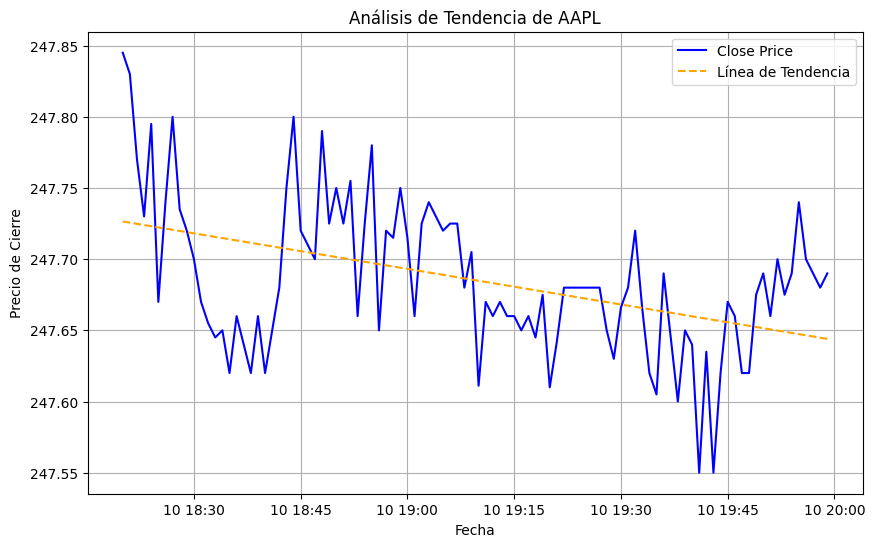

Pendiente de la línea de tendencia: 0.0008328670867086631
Valor de la intersección: 247.64401607920797


In [ ]:
from scipy.stats import linregress

# Cálculo de la regresión lineal
x = range(len(datos))  # El eje x será el índice de las fechas
y = datos['4. close'].values  # El valor de los precios de cierre

# Calculamos la pendiente, la intersección y el valor de la regresión
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculamos la línea de tendencia
trend_line = slope * pd.Series(x) + intercept

# Gráfico de la línea de tendencia
plt.figure(figsize=(10, 6))
plt.plot(datos.index, datos['4. close'], label='Close Price', color='blue')
plt.plot(datos.index, trend_line, label='Línea de Tendencia', color='orange', linestyle='--')
plt.title(f'Análisis de Tendencia de {symbol}')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.grid(True)
plt.legend()
plt.show()

# Información de la tendencia
print(f'Pendiente de la línea de tendencia: {slope}')
print(f'Valor de la intersección: {intercept}')

***INTERPRETACION:*** Este gráfico de tendencia probablemente está mostrando un análisis de la dirección general del precio a lo largo del tiempo, que podría estar basado en algún indicador de media móvil (como la SMA o alguna forma de suavización de los datos) o incluso en una línea de tendencia trazada manualmente.

En el gráfico podemos observar lo siguiente:

*  **Tendencia alcista (bullish):** Si el precio muestra un patrón de máximos y mínimos crecientes, se está indicando una tendencia alcista. Si los precios están por encima de una línea de tendencia ascendente o una media móvil en crecimiento, esto sugiere que el activo está en una fase de aprecio sostenido.

*  **Tendencia bajista (bearish):** Si el precio se mueve hacia abajo con máximos y mínimos decrecientes, o si cae por debajo de una línea de tendencia descendente o de una media móvil decreciente, esto indica que el activo está en una fase de depreciación o venta continua.


*  **Consolidación (neutral):** Si los precios se mueven lateralmente o dentro de un rango estrecho sin un claro patrón ascendente ni descendente, el mercado puede estar en una fase de consolidación o equilibrio, lo que sugiere que los compradores y vendedores están en una lucha por definir la dirección futura del precio.

El análisis de tendencia es útil para entender el sentimiento del mercado en un período determinado y determinar si se deben seguir las tendencias o esperar un cambio de dirección. Las señales de compra o venta generalmente se basan en la interpretación de la fuerza o debilidad de la tendencia.

***VOLATILIDAD***

Mide cuánto varían los precios de un activo en un período de tiempo determinado. La volatilidad puede indicar un mercado más arriesgado, lo que puede ser clave en la toma de decisiones sobre el riesgo.

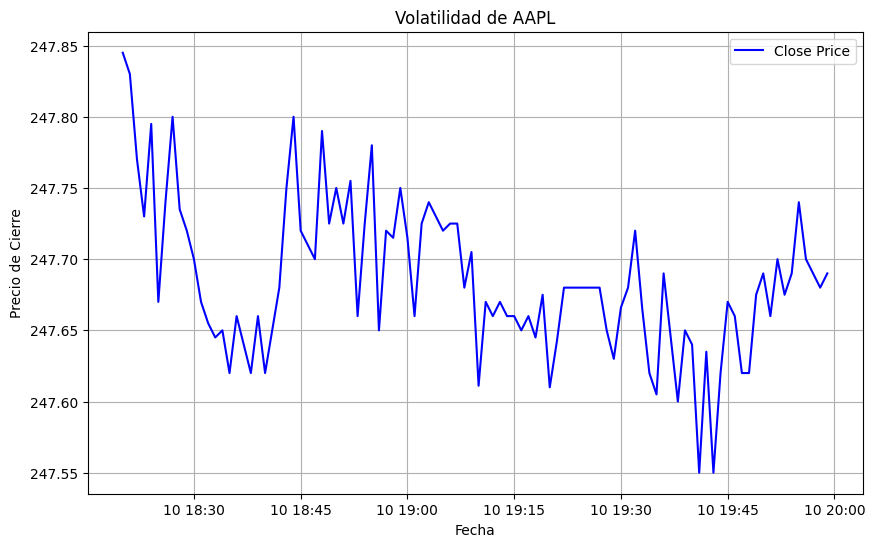

Volatilidad (desviación estándar) de los precios de cierre: 0.054038720227614155


In [ ]:
# Cálculo de la volatilidad (desviación estándar de los precios de cierre)
volatilidad = datos['4. close'].std()

# Gráfico de la volatilidad
plt.figure(figsize=(10, 6))
plt.plot(datos.index, datos['4. close'], label='Close Price', color='blue')
plt.title(f'Volatilidad de {symbol}')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.grid(True)
plt.legend()
plt.show()

print(f'Volatilidad (desviación estándar) de los precios de cierre: {volatilidad}')

***INTERPRETACION:*** El gráfico de volatilidad muestra cómo fluctúa el precio del activo en un período determinado. Aquí se observa si los movimientos de precios son grandes o pequeños, lo cual es fundamental para comprender la incertidumbre del mercado y los riesgos asociados. En este tipo de gráfico, la volatilidad suele estar representada por indicadores como las Bandas de Bollinger, que muestran la dispersión del precio en torno a una media móvil.


*   Si las bandas están más estrechas, indica que la volatilidad es baja, lo que significa que los precios están relativamente estables. Si las bandas se ensanchan, indica una mayor volatilidad, lo que sugiere que el precio está cambiando más drásticamente.

*   Si el precio se mueve hacia los extremos superior o inferior de las bandas, puede indicar una excesiva volatilidad y un posible retroceso o rebote, mientras que si se encuentra en el centro de las bandas, es probable que el precio siga consolidándose o moviéndose lateralmente.

En resumen, un aumento en la volatilidad generalmente sugiere mayor incertidumbre, lo que puede indicar que los inversores esperan grandes movimientos en el futuro cercano. También puede sugerir que el mercado está preparando un cambio de tendencia o que los movimientos actuales son solo fluctuaciones dentro de un rango.

***ANALISIS DE SENSIBILIDAD DEL MERCADO***

Estas métricas buscan medir el sentimiento general del mercado, como el índice de miedo y codicia, o la relación de acciones alcistas y bajistas. El sentimiento del mercado puede ayudar a anticipar movimientos en el mercado, ya que a menudo los precios siguen las emociones de los inversores.

<ipython-input-18-3f48211e86fd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos.loc[:, 'SMA_50'] = ta.sma(datos['4. close'], length=50)
<ipython-input-18-3f48211e86fd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos.loc[:, 'SMA_200'] = ta.sma(datos['4. close'], length=200)
<ipython-input-18-3f48211e86fd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

<Figure size 1400x1200 with 0 Axes>

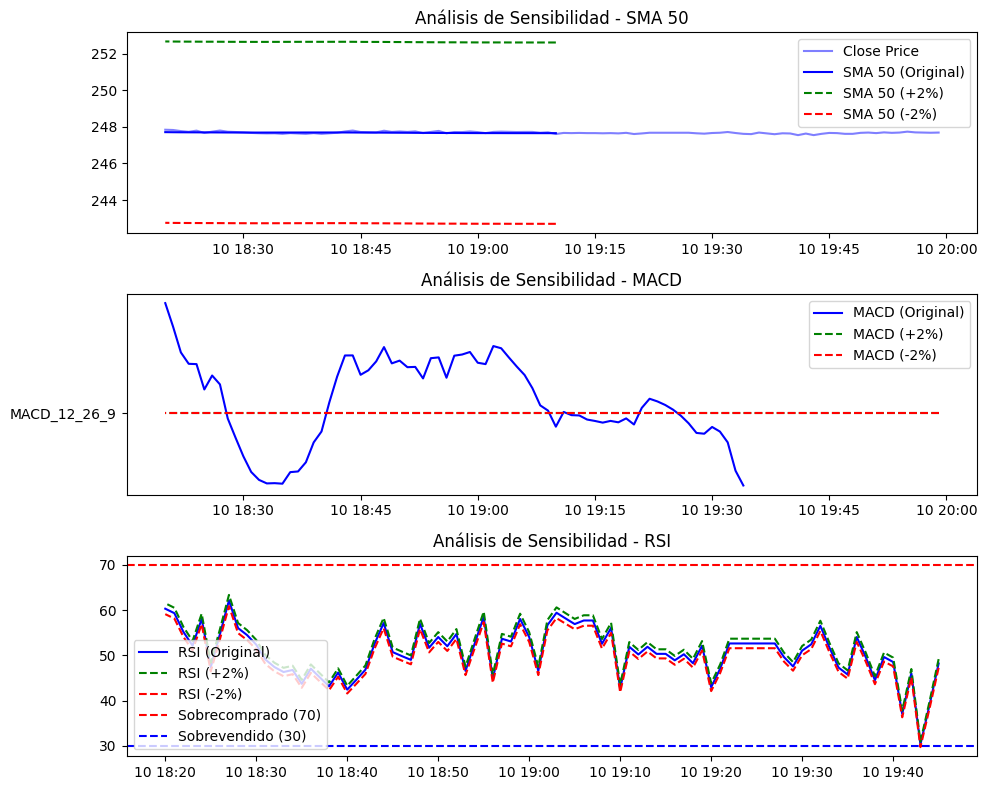

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta

# Supongamos que 'datos' es el DataFrame con los datos de Alpha Vantage.
# '4. close' es la columna de precios de cierre.

# Paso 1: Crear una función para calcular los indicadores técnicos
def calcular_indicadores(datos):
    datos.loc[:, 'SMA_50'] = ta.sma(datos['4. close'], length=50)
    datos.loc[:, 'SMA_200'] = ta.sma(datos['4. close'], length=200)
    datos.loc[:, 'MACD'], datos.loc[:, 'MACD_signal'], datos.loc[:, 'MACD_hist'] = ta.macd(datos['4. close'])
    datos.loc[:, 'RSI'] = ta.rsi(datos['4. close'])

    # Cálculo de las Bandas de Bollinger
    bbands_df = ta.bbands(datos['4. close'], length=20, std=2)

    # Acceso a las Bandas de Bollinger
    bollinger_upper = bbands_df[bbands_df.columns[0]]  # 'BBU_20_2.0'
    bollinger_middle = bbands_df[bbands_df.columns[1]]  # 'BBM_20_2.0'
    bollinger_lower = bbands_df[bbands_df.columns[2]]  # 'BBL_20_2.0'

    return datos

# Paso 2: Crear una función para realizar el análisis de sensibilidad
def analisis_sensibilidad(datos, sensibilidad_pct=0.02):
    # Simulamos un cambio en los precios de cierre (+/- 2%)
    datos_sensibilidad = datos.copy()

    # Incrementar y disminuir el precio de cierre
    datos_sensibilidad['close_plus'] = datos['4. close'] * (1 + sensibilidad_pct)
    datos_sensibilidad['close_minus'] = datos['4. close'] * (1 - sensibilidad_pct)

    # Calcular los indicadores para los tres escenarios
    datos_sensibilidad_plus = calcular_indicadores(datos_sensibilidad[['4. close', 'close_plus']])
    datos_sensibilidad_minus = calcular_indicadores(datos_sensibilidad[['4. close', 'close_minus']])

    return datos_sensibilidad, datos_sensibilidad_plus, datos_sensibilidad_minus

# Paso 3: Aplicar el análisis de sensibilidad al DataFrame original
# (Reemplaza 'datos' por tu DataFrame de datos de Alpha Vantage)
datos_sensibilidad, datos_sensibilidad_plus, datos_sensibilidad_minus = analisis_sensibilidad(datos)

# Paso 4: Graficar los resultados
plt.figure(figsize=(14, 12))

# Gráfico de las medias móviles (SMA 50 y SMA 200)
# Calcular las medias móviles (SMA 50)
sma_50 = ta.sma(datos['4. close'], length=50)

# Crear DataFrames de sensibilidad para SMA 50 con ajustes de +2% y -2%
sma_50_plus = sma_50 * 1.02  # SMA 50 con +2%
sma_50_minus = sma_50 * 0.98  # SMA 50 con -2%

# Asignar los resultados a nuevos DataFrames si es necesario
datos_sensibilidad_plus['SMA_50'] = sma_50_plus
datos_sensibilidad_minus['SMA_50'] = sma_50_minus

# Crear el gráfico
plt.figure(figsize=(10, 8))

# Subgráfico para el Análisis de Sensibilidad de la SMA 50
plt.subplot(3, 1, 1)
plt.plot(datos.index, datos['4. close'], label='Close Price', color='blue', alpha=0.5)  # Precio de cierre
plt.plot(datos.index, sma_50, label='SMA 50 (Original)', color='blue')
plt.plot(datos.index, sma_50_plus, label='SMA 50 (+2%)', linestyle='--', color='green')
plt.plot(datos.index, sma_50_minus, label='SMA 50 (-2%)', linestyle='--', color='red')
plt.title('Análisis de Sensibilidad - SMA 50')
plt.legend()

# Subgráfico para el Análisis de Sensibilidad del MACD
plt.subplot(3, 1, 2)
plt.plot(datos.index, datos['MACD'], label='MACD (Original)', color='blue')
plt.plot(datos.index, datos_sensibilidad_plus['MACD'], label='MACD (+2%)', linestyle='--', color='green')
plt.plot(datos.index, datos_sensibilidad_minus['MACD'], label='MACD (-2%)', linestyle='--', color='red')
plt.title('Análisis de Sensibilidad - MACD')
plt.legend()

# Subgráfico para el Análisis de Sensibilidad del RSI
rsi = ta.rsi(datos['4. close'], length=14)
rsi_plus = rsi * 1.02  # RSI con +2%
rsi_minus = rsi * 0.98  # RSI con -2%

# Asignar los resultados a nuevos DataFrames si es necesario
datos_sensibilidad_plus['RSI'] = rsi_plus
datos_sensibilidad_minus['RSI'] = rsi_minus

plt.subplot(3, 1, 3)
plt.plot(datos.index, rsi, label='RSI (Original)', color='blue')
plt.plot(datos.index, rsi_plus, label='RSI (+2%)', linestyle='--', color='green')
plt.plot(datos.index, rsi_minus, label='RSI (-2%)', linestyle='--', color='red')
plt.axhline(70, color='red', linestyle='--', label='Sobrecomprado (70)')
plt.axhline(30, color='blue', linestyle='--', label='Sobrevendido (30)')
plt.title(f'Análisis de Sensibilidad - RSI')
plt.legend()

plt.tight_layout()  # Para evitar que los gráficos se solapen
plt.show()

# Ajustar el espacio entre los subgráficos
plt.subplots_adjust(hspace=0.5)  # Ajuste para filas

***INTREPRETACION:***

1. **Análisis de Sensibilidad - SMA 50** (Media Móvil de 50 períodos):

*   **SMA 50 (Original):** La línea azul representa la media móvil simple de 50 períodos basada en el precio de cierre original. Este indicador es comúnmente utilizado para identificar tendencias a medio plazo.

*   **SMA 50 (+2%):** La línea verde, que es la media móvil de 50 períodos calculada con un incremento del 2% en el precio de cierre. El cambio en la SMA refleja cómo un aumento en los precios podría impactar en la tendencia.

*   **SMA 50 (-2%):** La línea roja muestra la media móvil con una disminución del 2% en los precios de cierre. Esto da una idea de cómo una caída en los precios afectaría la tendencia.

**Análisis:** La diferencia entre estas tres curvas te ayuda a visualizar cómo los movimientos en los precios afectan la media móvil. Si la SMA 50 con un aumento del 2% se desplaza considerablemente hacia arriba, podría indicar que el mercado está en una tendencia alcista. Por otro lado, si la SMA 50 con una disminución del 2% se desplaza hacia abajo, podría sugerir una tendencia bajista.

2. **Análisis de Sensibilidad - MACD** (Moving Average Convergence Divergence):

*   **MACD (Original):** La línea azul muestra el MACD original, que es un indicador de momentum que compara dos medias móviles exponenciales (por lo general, de 12 y 26 períodos) para detectar posibles cambios en la dirección de la tendencia.

*   **MACD (+2%) y MACD (-2%):** Las líneas verde y roja muestran cómo el MACD cambia si se incrementa o disminuye el precio de cierre en un 2%. Cambios en el MACD pueden indicar señales de compra o venta. Si el MACD con el +2% se aleja de la línea de señal o el MACD con el -2% se aproxima más a ella, podría indicar un cambio en la tendencia.

**Análisis:** Las divergencias entre el MACD y las señales de compra/venta pueden ser más evidentes cuando se compara el MACD en distintos escenarios (como en este caso con los ajustes de +2% y -2%).

3. **Análisis de Sensibilidad - RSI** (Relative Strength Index):

*   **RSI (Original):** El RSI es un indicador que mide la velocidad y el cambio de los movimientos de precios para determinar si un activo está sobrecomprado o sobrevendido. El valor estándar es de 14 períodos.

* **RSI (+2%) y RSI (-2%):** Las líneas verde y roja muestran cómo varía el RSI cuando se ajusta el precio de cierre en un 2%. Si el RSI con el +2% se acerca a los niveles de 70 o supera ese valor, podría indicar condiciones de sobrecompra. Si el RSI con el -2% cae por debajo de 30, podría indicar condiciones de sobreventa.

**Análisis:** En este gráfico, las líneas horizontales en 70 y 30 son niveles clave para interpretar el RSI:

*   Si el RSI supera 70, indica sobrecompra (probabilidad de corrección).
*   Si el RSI cae por debajo de 30, indica sobreventa (probabilidad de rebote).

**Conclusión General:**

Este gráfico te permite ver cómo el cambio en el precio de cierre afecta a los principales indicadores técnicos (SMA, MACD y RSI). Esto te da una perspectiva más completa sobre cómo podrían reaccionar los indicadores a los movimientos del mercado, ayudándote a tomar decisiones más informadas en el análisis técnico.
En términos generales, si las curvas de sensibilidad (+2% y -2%) siguen una tendencia similar al comportamiento original, esto indica que los indicadores son relativamente estables ante pequeños cambios en los precios. Sin embargo, si las curvas de sensibilidad muestran grandes diferencias, eso podría sugerir que el indicador es más sensible a los movimientos de precio.